In [1]:
import os
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# HW3

## Q1

In [2]:
keys34 = ['train_ep_lens_Average',
 'train_ep_lens_Std',
 'train_ep_lens_Median',
 'train_ep_lens_Min',
 'train_ep_lens_Max',
 'eval_ep_lens_Average',
 'eval_ep_lens_Std',
 'eval_ep_lens_Median',
 'eval_ep_lens_Min',
 'eval_ep_lens_Max',
 'train_returns_Average',
 'train_returns_Std',
 'train_returns_Median',
 'train_returns_Min',
 'train_returns_Max',
 'eval_returns_Average',
 'eval_returns_Std',
 'eval_returns_Median',
 'eval_returns_Min',
 'eval_returns_Max',
 'Train_EnvstepsSoFar',
 'TimeSinceStart',
 'reward_Average',
 'reward_Std',
 'reward_Median',
 'reward_Min',
 'reward_Max',
 'eval_reward_Average',
 'eval_reward_Std',
 'eval_reward_Median',
 'eval_reward_Min',
 'eval_reward_Max',
 'Initial_DataCollection_AverageReturn',
 'step']

keys35 = ['train_ep_lens_Average',
 'train_ep_lens_Std',
 'train_ep_lens_Median',
 'train_ep_lens_Min',
 'train_ep_lens_Max',
 'eval_ep_lens_Average',
 'eval_ep_lens_Std',
 'eval_ep_lens_Median',
 'eval_ep_lens_Min',
 'eval_ep_lens_Max',
 'train_returns_Average',
 'train_returns_Std',
 'train_returns_Median',
 'train_returns_Min',
 'train_returns_Max',
 'eval_returns_Average',
 'eval_returns_Std',
 'eval_returns_Median',
 'eval_returns_Min',
 'eval_returns_Max',
 'Train_EnvstepsSoFar',
 'TimeSinceStart',
 'Training_Loss',
 'reward_Average',
 'reward_Std',
 'reward_Median',
 'reward_Min',
 'reward_Max',
 'eval_reward_Average',
 'eval_reward_Std',
 'eval_reward_Median',
 'eval_reward_Min',
 'eval_reward_Max',
 'Initial_DataCollection_AverageReturn',
 'step']

def fix_the_data(file_path):
    fix_data = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            line = line.strip()
            frags = line.split(',')

            if i == 0:
                for key in frags:
                    fix_data[key] = []

                fix_data['Training_Loss'] = []
                continue

            if len(frags) == 34:
                fix_data['Training_Loss'].append(0)
                
                for key, val in zip(keys34, frags):
                    fix_data[key].append(val)
            else:
                for key, val in zip(keys35, frags):
                    fix_data[key].append(val)

            # Keys:

            

    return fix_data
    

In [ ]:
# read the data
log_file_path_exp1 = "../data/hw3_q2_dqn_1_LunarLander-v3_09-03-2024_16-35-36/log_data.csv"
log_file_path_exp2 = "../data/hw3_q2_dqn_2_LunarLander-v3_09-03-2024_16-35-20/log_data.csv"
log_file_path_exp3 = "../data/hw3_q2_dqn_3_LunarLander-v3_09-03-2024_16-34-59/log_data.csv"

log_data_exp1 = fix_the_data(log_file_path_exp1)
log_data_exp2 = fix_the_data(log_file_path_exp2)
log_data_exp3 = fix_the_data(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))

y_avg_returns = []
for i in range(len(y1_avg_returns)):
    y_avg_returns.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# cal. std dev of the mean curve
y_std_returns = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns.shape)
y_std_returns = np.std(y_std_returns, axis=0)
# for i in range(len(y1_avg_returns)):
#     y_std_returns.append(((float(y1_avg_returns[i]) - y_avg_returns[i])**2 + (float(y2_avg_returns[i]) - y_avg_returns[i])**2 + (float(y3_avg_returns[i]) - y_avg_returns[i])**2) / 3)


# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))

y_avg_returns_ddqn = []
for i in range(len(y1_avg_returns)):
    y_avg_returns_ddqn.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# cal. std dev of the mean curve
y_std_returns_ddqn = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns_ddqn.shape)
y_std_returns_ddqn = np.std(y_std_returns_ddqn, axis=0)
# for i in range(len(y1_avg_returns)):
#     y_std_returns.append(((float(y1_avg_returns[i]) - y_avg_returns[i])**2 + (float(y2_avg_returns[i]) - y_avg_returns[i])**2 + (float(y3_avg_returns[i]) - y_avg_returns[i])**2) / 3)


new_x_timesteps = log_data_exp1['step']
# new_x_timesteps = []
# for i in range(len(x_timesteps)):
#     new_x_timesteps.append(str(i) + 'K')
print("x_timesteps: ", new_x_timesteps)

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

# y_std_returns = [0.0] * len(y_avg_returns)
ax.errorbar(new_x_timesteps, y_avg_returns, y_std_returns, fmt='-', label='DQN')
# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("DQN on LunarLander-v3 (w/ 3 seeds)")
# plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()


50
50
50
(3, 50)
50
50
50
(3, 50)
x_timesteps:  ['0', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000', '190000', '200000', '210000', '220000', '230000', '240000', '250000', '260000', '270000', '280000', '290000', '300000', '310000', '320000', '330000', '340000', '350000', '360000', '370000', '380000', '390000', '400000', '410000', '420000', '430000', '440000', '450000', '460000', '470000', '480000', '490000']


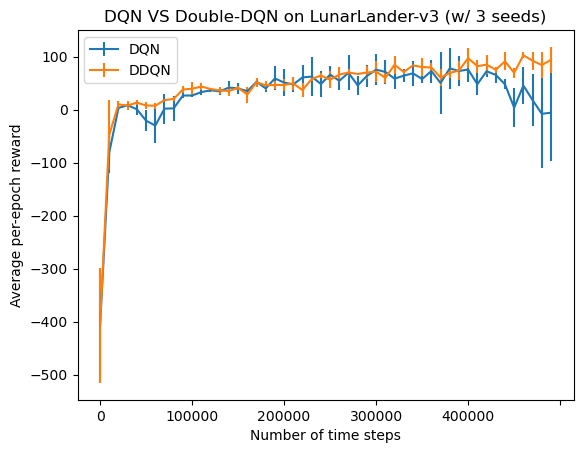

In [14]:
# read the data
log_file_path_exp1 = "../data/hw3_q2_dqn_1_LunarLander-v3_09-03-2024_16-35-36/log_data.csv"
log_file_path_exp2 = "../data/hw3_q2_dqn_2_LunarLander-v3_09-03-2024_16-35-20/log_data.csv"
log_file_path_exp3 = "../data/hw3_q2_dqn_3_LunarLander-v3_09-03-2024_16-34-59/log_data.csv"

log_data_exp1 = fix_the_data(log_file_path_exp1)
log_data_exp2 = fix_the_data(log_file_path_exp2)
log_data_exp3 = fix_the_data(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))

y_avg_returns = []
for i in range(len(y1_avg_returns)):
    y_avg_returns.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# cal. std dev of the mean curve
y_std_returns = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns.shape)
y_std_returns = np.std(y_std_returns, axis=0)
# for i in range(len(y1_avg_returns)):
#     y_std_returns.append(((float(y1_avg_returns[i]) - y_avg_returns[i])**2 + (float(y2_avg_returns[i]) - y_avg_returns[i])**2 + (float(y3_avg_returns[i]) - y_avg_returns[i])**2) / 3)


# read the data
log_file_path_exp1 = "../data/hw3_q2_doubledqn_1_LunarLander-v3_09-03-2024_16-31-04/log_data.csv"
log_file_path_exp2 = "../data/hw3_q2_doubledqn_2_LunarLander-v3_09-03-2024_16-33-26/log_data.csv"
log_file_path_exp3 = "../data/hw3_q2_doubledqn_3_LunarLander-v3_09-03-2024_16-33-28/log_data.csv"

log_data_exp1 = fix_the_data(log_file_path_exp1)
log_data_exp2 = fix_the_data(log_file_path_exp2)
log_data_exp3 = fix_the_data(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
# y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
# y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
# y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))

y_avg_returns_ddqn = []
for i in range(len(y1_avg_returns)):
    y_avg_returns_ddqn.append((float(y1_avg_returns[i]) + float(y2_avg_returns[i]) + float(y3_avg_returns[i])) / 3)

# cal. std dev of the mean curve
y_std_returns_ddqn = np.array([y1_avg_returns, y2_avg_returns, y3_avg_returns], dtype=float)
print(y_std_returns_ddqn.shape)
y_std_returns_ddqn = np.std(y_std_returns_ddqn, axis=0)
# for i in range(len(y1_avg_returns)):
#     y_std_returns.append(((float(y1_avg_returns[i]) - y_avg_returns[i])**2 + (float(y2_avg_returns[i]) - y_avg_returns[i])**2 + (float(y3_avg_returns[i]) - y_avg_returns[i])**2) / 3)




new_x_timesteps = log_data_exp1['step']
# new_x_timesteps = []
# for i in range(len(x_timesteps)):
#     new_x_timesteps.append(str(i) + 'K')
print("x_timesteps: ", new_x_timesteps)

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

# y_std_returns = [0.0] * len(y_avg_returns)
ax.errorbar(new_x_timesteps, y_avg_returns, y_std_returns, fmt='-', label='DQN')
ax.errorbar(new_x_timesteps, y_avg_returns_ddqn, y_std_returns_ddqn, fmt='-', label='DDQN')
# ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
# ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("DQN VS Double-DQN on LunarLander-v3 (w/ 3 seeds)")
# plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()


## Q3

50
50
50
50
50
50
50
50
['0', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000', '190000', '200000', '210000', '220000', '230000', '240000', '250000', '260000', '270000', '280000', '290000', '300000', '310000', '320000', '330000', '340000', '350000', '360000', '370000', '380000', '390000', '400000', '410000', '420000', '430000', '440000', '450000', '460000', '470000', '480000', '490000']
[-545.9597, 7.1823645, 8.658473, -26.525385, -3.476674, 34.12012, 23.018446, 24.930563, 21.039421, 44.518032, 42.8613, 38.41272, 48.93292, 39.401375, 17.562365, 46.697697, 52.09288, 57.422276, 26.120129, 110.95285, 124.43771, 97.88293, 51.46407, 61.75498, 40.136852, -7.1144767, 123.14651, 94.84341, 72.7487, 117.24912, 121.36865, 130.3365, 89.67011, 86.6294, 84.003105, 121.27943, 109.66759, 123.9501, 100.076225, 112.376595, 116.969475, 121.29862, 120.4304, 141.6667, 137.16003, 99.19325

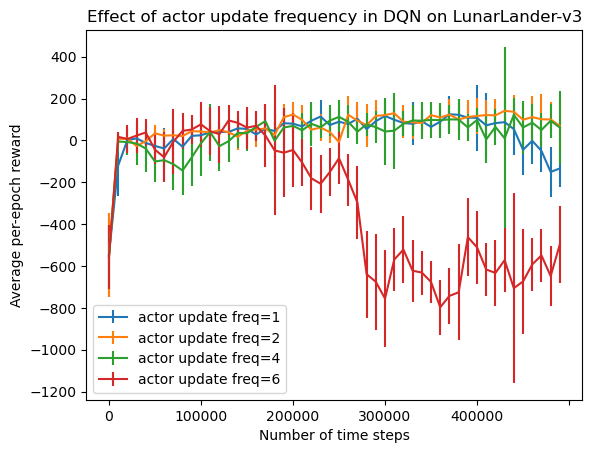

In [24]:
log_file_path_exp1 = "../data/hw3_q2_dqn_1_LunarLander-v3_09-03-2024_16-35-36/log_data.csv"
log_file_path_exp2 = "../data/hw3_q3_hparam1_LunarLander-v3_09-03-2024_16-45-40/log_data.csv"
log_file_path_exp3 = "../data/hw3_q3_hparam2_LunarLander-v3_09-03-2024_16-46-49/log_data.csv"
log_file_path_exp4 = "../data/hw3_q3_hparam3_LunarLander-v3_09-03-2024_16-47-51/log_data.csv"


log_data_exp1 = fix_the_data(log_file_path_exp1)
log_data_exp2 = fix_the_data(log_file_path_exp2)
log_data_exp3 = fix_the_data(log_file_path_exp3)
log_data_exp4 = fix_the_data(log_file_path_exp4)


# plot it
y1_avg_returns = [float(x) for x in log_data_exp1['eval_returns_Average']]; print(len(y1_avg_returns))
y1_std_returns = [float(x) for x in log_data_exp1['eval_returns_Std']]; print(len(y1_std_returns))
y2_avg_returns = [float(x) for x in log_data_exp2['eval_returns_Average']]; print(len(y2_avg_returns))
y2_std_returns = [float(x) for x in log_data_exp2['eval_returns_Std']]; print(len(y2_std_returns))
y3_avg_returns = [float(x) for x in log_data_exp3['eval_returns_Average']]; print(len(y3_avg_returns))
y3_std_returns = [float(x) for x in log_data_exp3['eval_returns_Std']]; print(len(y3_std_returns))
y4_avg_returns = [float(x) for x in log_data_exp4['eval_returns_Average']]; print(len(y4_avg_returns))
y4_std_returns = [float(x) for x in log_data_exp4['eval_returns_Std']]; print(len(y4_std_returns))

x_timesteps = log_data_exp1['step']

print(x_timesteps)
print(y2_avg_returns)
print(y2_std_returns)

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='actor update freq=1')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='actor update freq=2')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='actor update freq=4')
ax.errorbar(x_timesteps, y4_avg_returns, y4_std_returns, fmt='-', label='actor update freq=6')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Effect of actor update frequency in DQN on LunarLander-v3")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()



# Part 2

## Q4

20
20
20
20
20
20


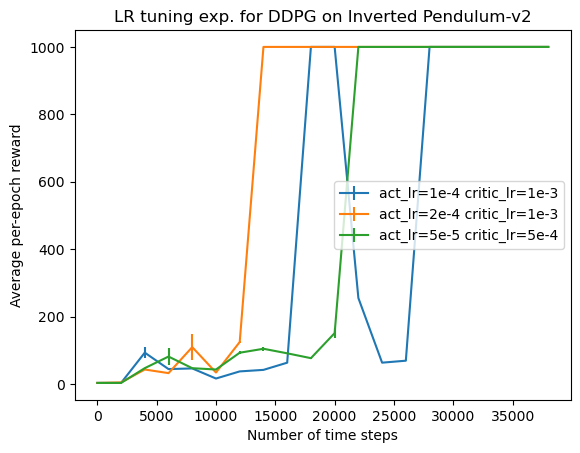

In [5]:
# read the data
log_file_path_exp1 = "../data/hw3_q4_ddpg_up4_lr1e-4_InvertedPendulum-v2_08-03-2024_18-30-34/log_data.csv"
log_file_path_exp2 = "../data/hw3_q4_ddpg_up4_lr2e-4_InvertedPendulum-v2_08-03-2024_19-03-35/log_data.csv"
log_file_path_exp3 = "../data/hw3_q4_ddpg_up4_lr5e-5_InvertedPendulum-v2_08-03-2024_18-47-16/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)[:20]
log_data_exp2 = pd.read_csv(log_file_path_exp2)[:20]
log_data_exp3 = pd.read_csv(log_file_path_exp3)[:20]

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='act_lr=1e-4 critic_lr=1e-3')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_lr=2e-4 critic_lr=1e-3')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_lr=5e-5 critic_lr=5e-4')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("LR tuning exp. for DDPG on Inverted Pendulum-v2")
plt.show()


20
20
20
20
20
20


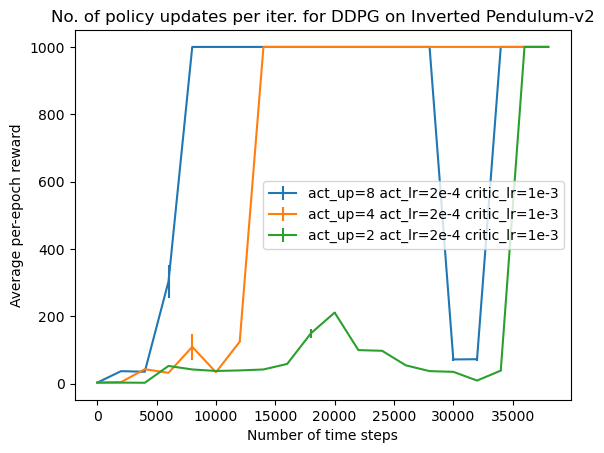

In [4]:
# read the data
log_file_path_exp1 = "../data/hw3_q4_ddpg_up8_lr2e-4_InvertedPendulum-v2_09-03-2024_02-57-18/log_data.csv"
log_file_path_exp2 = "../data/hw3_q4_ddpg_up4_lr2e-4_InvertedPendulum-v2_08-03-2024_19-03-35/log_data.csv"
log_file_path_exp3 = "../data/hw3_q4_ddpg_up2_lr2e-4_InvertedPendulum-v2_09-03-2024_02-50-26/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)[:20]
log_data_exp2 = pd.read_csv(log_file_path_exp2)[:20]
log_data_exp3 = pd.read_csv(log_file_path_exp3)[:20]

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='act_up=8 act_lr=2e-4 critic_lr=1e-3')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='act_up=4 act_lr=2e-4 critic_lr=1e-3')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='act_up=2 act_lr=2e-4 critic_lr=1e-3')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("No. of policy updates per iter. for DDPG on Inverted Pendulum-v2")
plt.show()


## Q5

40
40


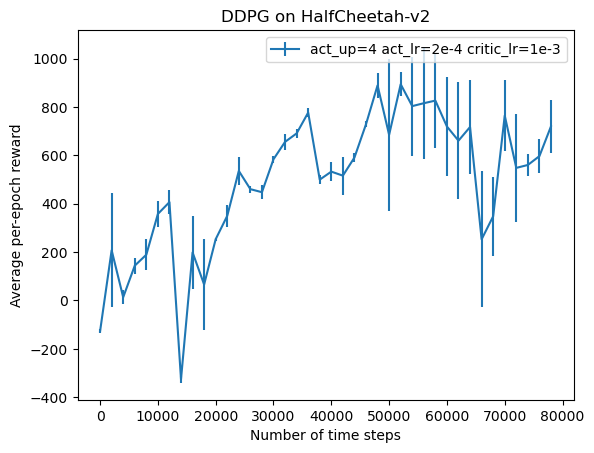

In [4]:
# read the data
log_file_path_exp1 = "../data/hw3_q5_ddpg_hard_up4_lr2e-3_HalfCheetah-v2_09-03-2024_14-12-19/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='act_up=4 act_lr=2e-4 critic_lr=1e-3')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("DDPG on HalfCheetah-v2")
plt.show()


# Part 3: TD3

## Q6

30
30
30
30
30
30


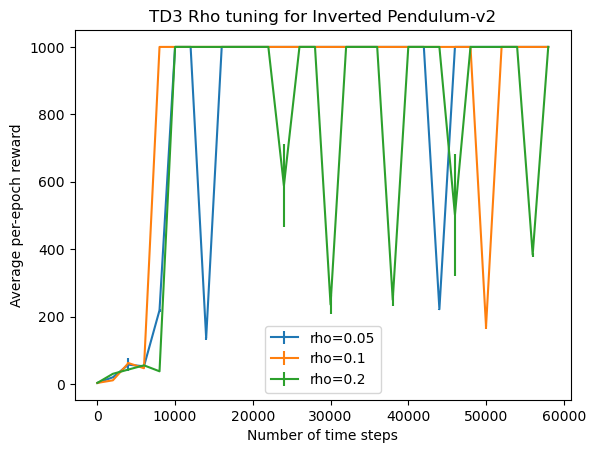

In [5]:
# read the data
log_file_path_exp1 = "../data/hw3_q6_td3_shape_256-256_rho0.05_InvertedPendulum-v2_09-03-2024_02-45-49/log_data.csv"
log_file_path_exp2 = "../data/hw3_q6_td3_shape_256-256_rho0.1_InvertedPendulum-v2_09-03-2024_03-02-05/log_data.csv"
log_file_path_exp3 = "../data/hw3_q6_td3_shape_256-256_rho0.2_InvertedPendulum-v2_09-03-2024_02-11-42/log_data.csv"


log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='rho=0.05')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='rho=0.1')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='rho=0.2')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("TD3 Rho tuning for Inverted Pendulum-v2")
plt.show()


30
30
30
30
30
30


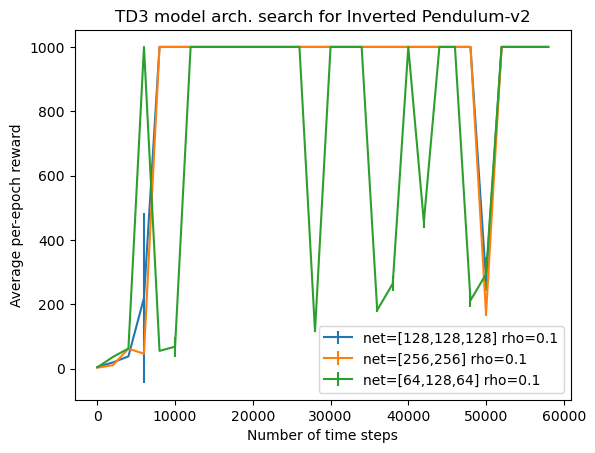

In [3]:
# read the data
log_file_path_exp1 = "../data/hw3_q6_td3_shape_128-128-128_rho0.1_InvertedPendulum-v2_09-03-2024_01-51-18/log_data.csv"
log_file_path_exp2 = "../data/hw3_q6_td3_shape_256-256_rho0.1_InvertedPendulum-v2_09-03-2024_03-02-05/log_data.csv"
log_file_path_exp3 = "../data/hw3_q6_td3_shape_64-128-64_rho0.1_InvertedPendulum-v2_09-03-2024_13-53-47/log_data.csv"


log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='net=[128,128,128] rho=0.1')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='net=[256,256] rho=0.1')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='net=[64,128,64] rho=0.1')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("TD3 model arch. search for Inverted Pendulum-v2")
plt.show()


## Q7

40
40
40
40


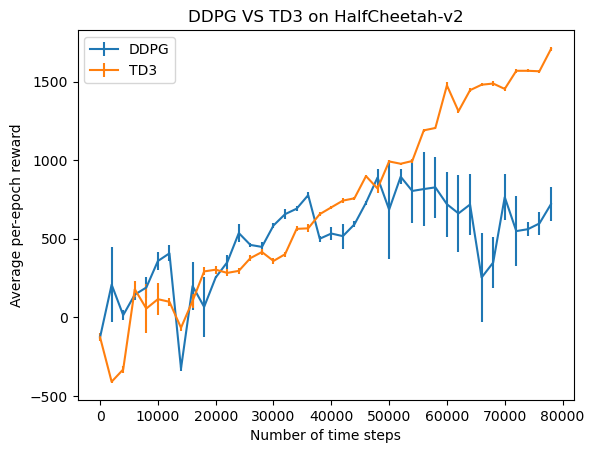

In [7]:
# read the data
log_file_path_exp1 = "../data/hw3_q5_ddpg_hard_up4_lr2e-3_HalfCheetah-v2_09-03-2024_14-12-19/log_data.csv"
log_file_path_exp2 = "../data/hw3_q7_td3_shape_256-256_rho0.1_HalfCheetah-v2_09-03-2024_13-53-18/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='DDPG')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='TD3')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("DDPG VS TD3 on HalfCheetah-v2")
plt.show()


30
30
30
30
30
30


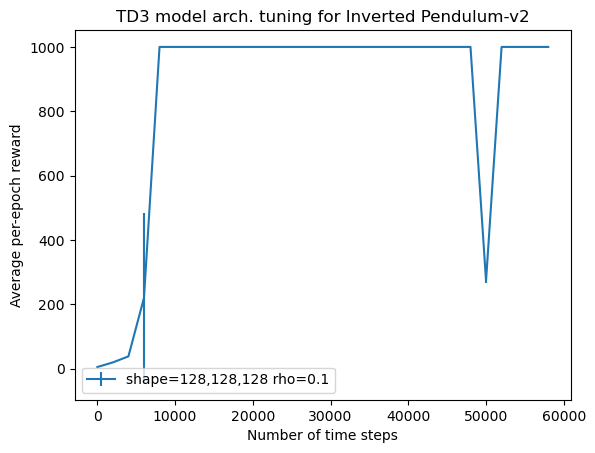

In [10]:
# read the data
log_file_path_exp1 = "../data/hw3_q6_td3_shape_128-128-128_rho0.1_InvertedPendulum-v2_09-03-2024_01-51-18/log_data.csv"
log_file_path_exp2 = "../data/hw3_q6_td3_shape_256-256_rho0.1_InvertedPendulum-v2_09-03-2024_03-02-05/log_data.csv"
log_file_path_exp3 = "../data/hw3_q6_td3_shape_64-128-64_rho0.1_InvertedPendulum-v2_09-03-2024_03-02-05/log_data.csv"


log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='shape=128,128,128 rho=0.1')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='shape=256,256 rho=0.1')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='shape=256,256 rho=0.1')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("TD3 model arch. tuning for Inverted Pendulum-v2")
plt.show()


# Part 4: SAC

## Q8

30
30
30
30
30
30


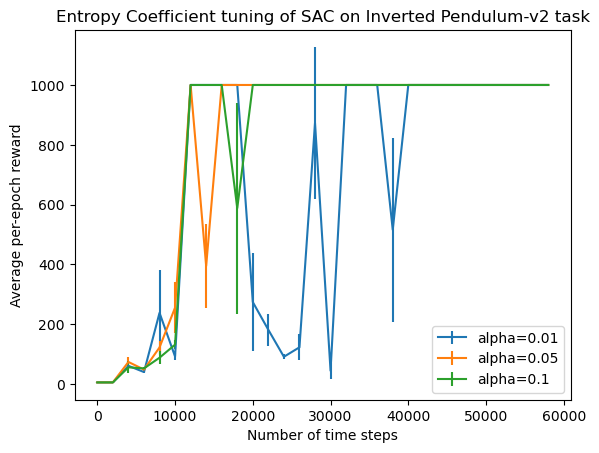

In [7]:
# read the data
log_file_path_exp1 = "../data/hw3_q8_sac_alpha0.01_InvertedPendulum-v2_08-03-2024_18-47-31/log_data.csv"
log_file_path_exp2 = "../data/hw3_q8_sac_alpha0.05_InvertedPendulum-v2_08-03-2024_18-30-19/log_data.csv"
log_file_path_exp3 = "../data/hw3_q8_sac_alpha0.1_InvertedPendulum-v2_08-03-2024_19-04-15/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='alpha=0.01')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='alpha=0.05')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='alpha=0.1')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("Entropy Coefficient tuning of SAC on Inverted Pendulum-v2 task")
plt.show()


## Q9

40
40
40
40
40
40


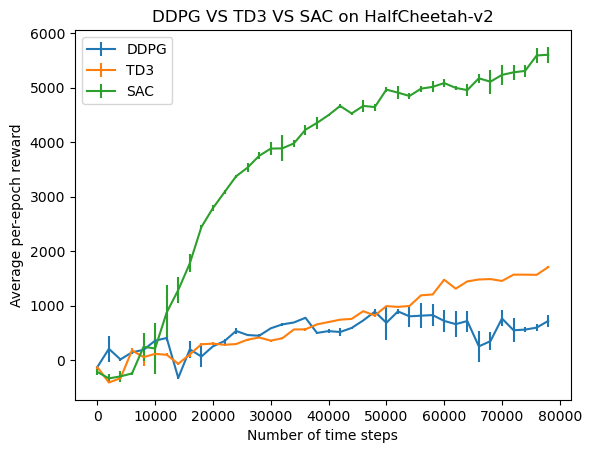

In [3]:
# read the data
log_file_path_exp1 = "../data/hw3_q5_ddpg_hard_up4_lr2e-3_HalfCheetah-v2_09-03-2024_14-12-19/log_data.csv"
log_file_path_exp2 = "../data/hw3_q7_td3_shape_256-256_rho0.1_HalfCheetah-v2_09-03-2024_13-53-18/log_data.csv"
log_file_path_exp3 = "../data/hw3_q9_sac_alpha0.05_HalfCheetah-v2_09-03-2024_17-37-53/log_data.csv"

log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# plot it
y1_avg_returns = log_data_exp1['eval_returns_Average']; print(len(y1_avg_returns))
y1_std_returns = log_data_exp1['eval_returns_Std']; print(len(y1_std_returns))
y2_avg_returns = log_data_exp2['eval_returns_Average']; print(len(y2_avg_returns))
y2_std_returns = log_data_exp2['eval_returns_Std']; print(len(y2_std_returns))
y3_avg_returns = log_data_exp3['eval_returns_Average']; print(len(y3_avg_returns))
y3_std_returns = log_data_exp3['eval_returns_Std']; print(len(y3_std_returns))
x_timesteps = log_data_exp1['step']

## Draw plot with std dev as boundry around the mean curve with lighter shade
fig, ax = plt.subplots()

ax.errorbar(x_timesteps, y1_avg_returns, y1_std_returns, fmt='-', label='DDPG')
ax.errorbar(x_timesteps, y2_avg_returns, y2_std_returns, fmt='-', label='TD3')
ax.errorbar(x_timesteps, y3_avg_returns, y3_std_returns, fmt='-', label='SAC')
ax.set_xlabel("Number of time steps")
ax.set_ylabel("Average per-epoch reward")
ax.legend()
ax.set_title("DDPG VS TD3 VS SAC on HalfCheetah-v2")
plt.show()


## Q3

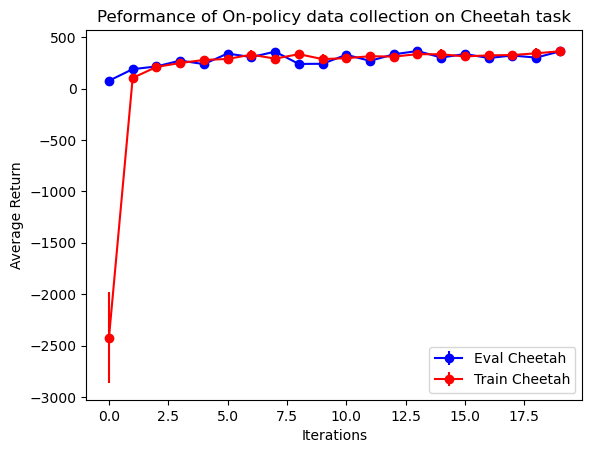

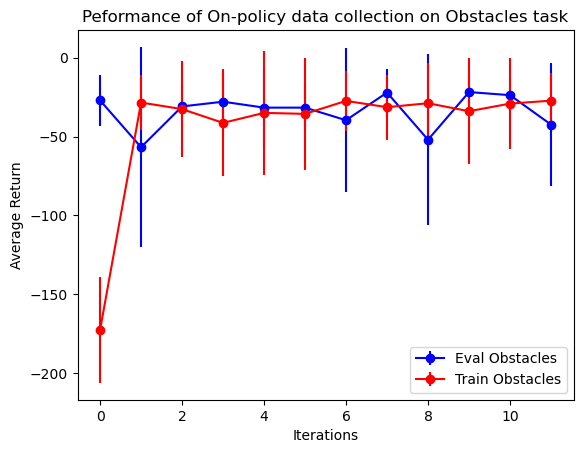

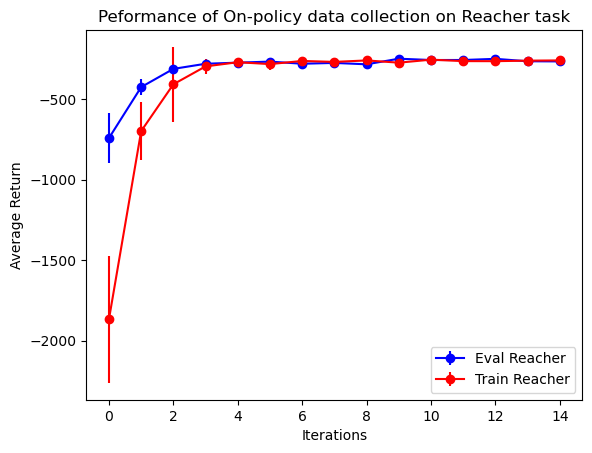

In [3]:
log_file_path_exp1 = "run_logs/q3/q3_cheetah/log_data.csv"
log_file_path_exp2 = "run_logs/q3/q3_obstacles/log_data.csv"
log_file_path_exp3 = "run_logs/q3/q3_reacher/log_data.csv"

# read the csv log file with headers
# headers: trainer/Eval_AverageReturn,trainer/Eval_StdReturn,trainer/Eval_MaxReturn,trainer/Eval_MinReturn,trainer/Eval_AverageEpLen,trainer/Train_AverageReturn,trainer/Train_StdReturn,trainer/Train_MaxReturn,trainer/Train_MinReturn,trainer/Train_AverageEpLen,trainer/Train_EnvstepsSoFar,trainer/Train_AverageRewardSoFar,trainer/Eval_AverageRewardSoFar,trainer/TimeSinceStart,trainer/Training Loss,trainer/Initial_DataCollection_AverageReturn
log_data_exp1 = pd.read_csv(log_file_path_exp1)
log_data_exp2 = pd.read_csv(log_file_path_exp2)
log_data_exp3 = pd.read_csv(log_file_path_exp3)

# eval_y = [-45.71]
# eval_std = [37.22]
# train_y = [-172.54]
# train_std = [30.06]

eval_y_exp1 = log_data_exp1['trainer/Eval_AverageReturn']
eval_std_exp1 = log_data_exp1['trainer/Eval_StdReturn']
train_y_exp1 = log_data_exp1['trainer/Train_AverageReturn']
train_std_exp1 = log_data_exp1['trainer/Train_StdReturn']

x_exp1 = range(len(eval_y_exp1)) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()
ax.errorbar(x_exp1, eval_y_exp1, eval_std_exp1, fmt='-o', color='blue', label='Eval Cheetah')
ax.errorbar(x_exp1, train_y_exp1, train_std_exp1, fmt='-o', color='red', label='Train Cheetah')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
plt.legend(loc="lower right")
ax.set_title("Peformance of On-policy data collection on Cheetah task")
plt.show()

# ========================================
fig, ax = plt.subplots()
eval_y_exp2 = log_data_exp2['trainer/Eval_AverageReturn']
eval_std_exp2 = log_data_exp2['trainer/Eval_StdReturn']
train_y_exp2 = log_data_exp2['trainer/Train_AverageReturn']
train_std_exp2 = log_data_exp2['trainer/Train_StdReturn']

x_exp2 = range(len(eval_y_exp2)) # iteration number

ax.errorbar(x_exp2, eval_y_exp2, eval_std_exp2, fmt='-o', color='blue', label='Eval Obstacles')
ax.errorbar(x_exp2, train_y_exp2, train_std_exp2, fmt='-o', color='red', label='Train Obstacles')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
plt.legend(loc="lower right")
ax.set_title("Peformance of On-policy data collection on Obstacles task")
plt.show()

# ========================================
fig, ax = plt.subplots()

eval_y_exp3 = log_data_exp3['trainer/Eval_AverageReturn']
eval_std_exp3 = log_data_exp3['trainer/Eval_StdReturn']
train_y_exp3 = log_data_exp3['trainer/Train_AverageReturn']
train_std_exp3 = log_data_exp3['trainer/Train_StdReturn']

x_exp3 = range(len(eval_y_exp3)) # iteration number

ax.errorbar(x_exp3, eval_y_exp3, eval_std_exp3, fmt='-o', color='blue', label='Eval Reacher')
ax.errorbar(x_exp3, train_y_exp3, train_std_exp3, fmt='-o', color='red', label='Train Reacher')


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
plt.legend(loc="lower right")
ax.set_title("Peformance of On-policy data collection on Reacher task")
plt.show()

## Q4

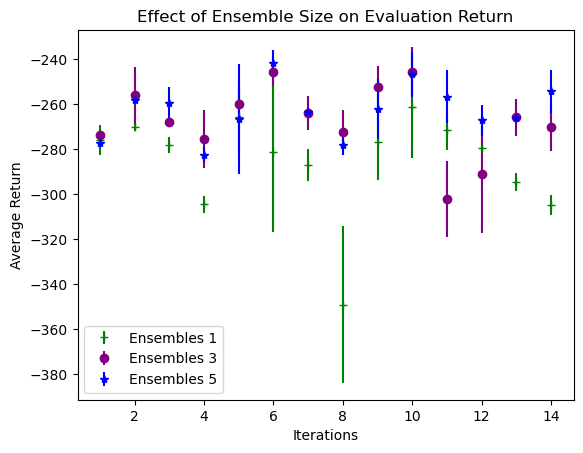

In [4]:
# effect of ensemble size
log_file_en1 = "run_logs/q4/q4_reacher_ensemble1/log_data.csv"
log_file_en3 = "run_logs/q4/q4_reacher_ensemble3/log_data.csv"
log_file_en5 = "run_logs/q4/q4_reacher_ensemble5/log_data.csv"

log_data_en1 = pd.read_csv(log_file_en1)
log_data_en3 = pd.read_csv(log_file_en3)
log_data_en5 = pd.read_csv(log_file_en5)

eval_y_en1 = log_data_en1['trainer/Eval_AverageReturn'][1:]
eval_std_en1 = log_data_en1['trainer/Eval_StdReturn'][1:]
train_y_en1 = log_data_en1['trainer/Train_AverageReturn'][1:]
train_std_en1 = log_data_en1['trainer/Train_StdReturn'][1:]

x_en1 = range(1, len(eval_y_en1) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()
ax.errorbar(x_en1, eval_y_en1, eval_std_en1, fmt='+', color='green', label='Ensembles 1')
# ax.errorbar(x_en1, train_y_en1, train_std_en1, fmt='+', color='green', label='Train Ensemble 1')


eval_y_en3 = log_data_en3['trainer/Eval_AverageReturn'][1:]
eval_std_en3 = log_data_en3['trainer/Eval_StdReturn'][1:]
train_y_en3 = log_data_en3['trainer/Train_AverageReturn'][1:]
train_std_en3 = log_data_en3['trainer/Train_StdReturn'][1:]

x_en3 = range(1, len(eval_y_en3) + 1) # iteration number

ax.errorbar(x_en3, eval_y_en3, eval_std_en3, fmt='o', color='purple', label='Ensembles 3')
# ax.errorbar(x_en3, train_y_en3, train_std_en3, fmt='o', color='purple', label='Train Ensemble 3')


eval_y_en5 = log_data_en5['trainer/Eval_AverageReturn'][1:]
eval_std_en5 = log_data_en5['trainer/Eval_StdReturn'][1:]
train_y_en5 = log_data_en5['trainer/Train_AverageReturn'][1:]
train_std_en5 = log_data_en5['trainer/Train_StdReturn'][1:]

x_en5 = range(1, len(eval_y_en5) + 1) # iteration number

ax.errorbar(x_en5, eval_y_en5, eval_std_en5, fmt='*', color='blue', label='Ensembles 5')
# ax.errorbar(x_en5, train_y_en5, train_std_en5, fmt='*', color='blue', label='Train Ensemble 5')


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Effect of Ensemble Size on Evaluation Return')
plt.show()


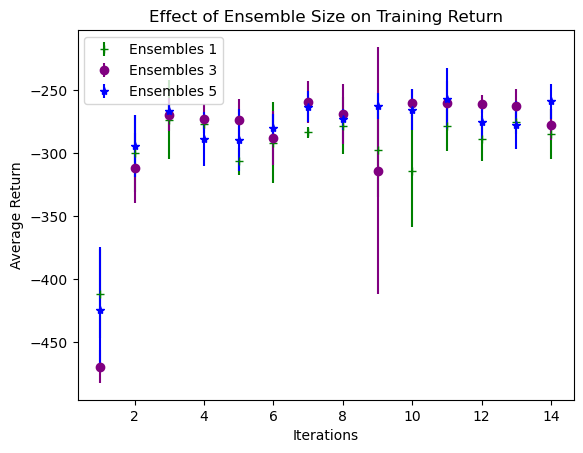

In [5]:
# effect of ensemble size
log_file_en1 = "run_logs/q4/q4_reacher_ensemble1/log_data.csv"
log_file_en3 = "run_logs/q4/q4_reacher_ensemble3/log_data.csv"
log_file_en5 = "run_logs/q4/q4_reacher_ensemble5/log_data.csv"

log_data_en1 = pd.read_csv(log_file_en1)
log_data_en3 = pd.read_csv(log_file_en3)
log_data_en5 = pd.read_csv(log_file_en5)

eval_y_en1 = log_data_en1['trainer/Eval_AverageReturn'][1:]
eval_std_en1 = log_data_en1['trainer/Eval_StdReturn'][1:]
train_y_en1 = log_data_en1['trainer/Train_AverageReturn'][1:]
train_std_en1 = log_data_en1['trainer/Train_StdReturn'][1:]

x_en1 = range(1, len(eval_y_en1) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()
# ax.errorbar(x_en1, eval_y_en1, eval_std_en1, fmt='+', color='green', label='Eval Ensemble 1')
ax.errorbar(x_en1, train_y_en1, train_std_en1, fmt='+', color='green', label='Ensembles 1')


eval_y_en3 = log_data_en3['trainer/Eval_AverageReturn'][1:]
eval_std_en3 = log_data_en3['trainer/Eval_StdReturn'][1:]
train_y_en3 = log_data_en3['trainer/Train_AverageReturn'][1:]
train_std_en3 = log_data_en3['trainer/Train_StdReturn'][1:]

x_en3 = range(1, len(eval_y_en3) + 1) # iteration number

# ax.errorbar(x_en3, eval_y_en3, eval_std_en3, fmt='o', color='purple', label='Eval Ensemble 3')
ax.errorbar(x_en3, train_y_en3, train_std_en3, fmt='o', color='purple', label='Ensembles 3')


eval_y_en5 = log_data_en5['trainer/Eval_AverageReturn'][1:]
eval_std_en5 = log_data_en5['trainer/Eval_StdReturn'][1:]
train_y_en5 = log_data_en5['trainer/Train_AverageReturn'][1:]
train_std_en5 = log_data_en5['trainer/Train_StdReturn'][1:]

x_en5 = range(1, len(eval_y_en5) + 1) # iteration number

# ax.errorbar(x_en5, eval_y_en5, eval_std_en5, fmt='*', color='blue', label='Eval Ensemble 5')
ax.errorbar(x_en5, train_y_en5, train_std_en5, fmt='*', color='blue', label='Ensembles 5')


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Effect of Ensemble Size on Training Return')
plt.show()


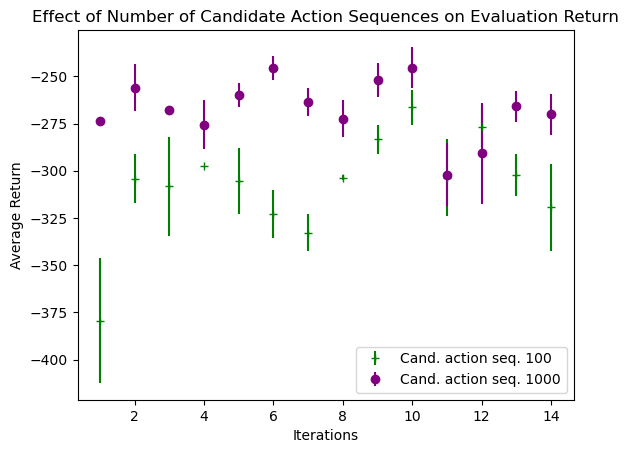

In [6]:
# effect of the number of candidate action sequences
log_file_nb100 = "run_logs/q4/q4_reacher_numseq100/log_data.csv"
log_file_nb1000 = "run_logs/q4/q4_reacher_numseq1000/log_data.csv"

log_data_nb100 = pd.read_csv(log_file_nb100)
log_data_nb1000 = pd.read_csv(log_file_nb1000)

eval_y_nb100 = log_data_nb100['trainer/Eval_AverageReturn'][1:]
eval_std_nb100 = log_data_nb100['trainer/Eval_StdReturn'][1:]
train_y_nb100 = log_data_nb100['trainer/Train_AverageReturn'][1:]
train_std_nb100 = log_data_nb100['trainer/Train_StdReturn'][1:]

x_nb100 = range(1, len(eval_y_nb100) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()
ax.errorbar(x_nb100, eval_y_nb100, eval_std_nb100, fmt='+', color='green', label='Cand. action seq. 100')

eval_y_nb1000 = log_data_nb1000['trainer/Eval_AverageReturn'][1:]
eval_std_nb1000 = log_data_nb1000['trainer/Eval_StdReturn'][1:]

x_nb1000 = range(1, len(eval_y_nb1000) + 1) # iteration number

ax.errorbar(x_nb1000, eval_y_nb1000, eval_std_nb1000, fmt='o', color='purple', label='Cand. action seq. 1000')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
# change legend location to bottom right
plt.legend(loc="lower right")
ax.title.set_text('Effect of Number of Candidate Action Sequences on Evaluation Return')
plt.show()

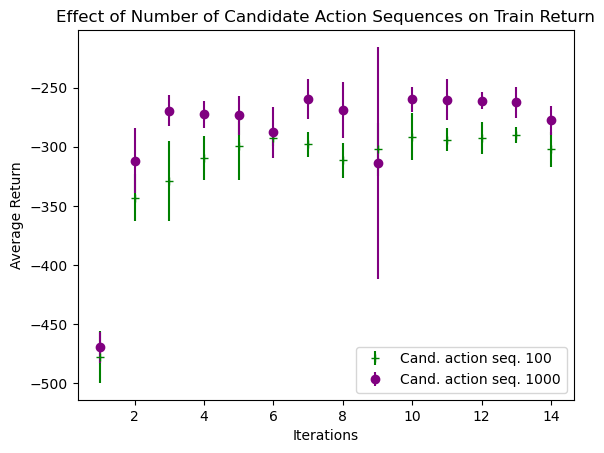

In [7]:
# effect of the number of candidate action sequences
log_file_nb100 = "run_logs/q4/q4_reacher_numseq100/log_data.csv"
log_file_nb1000 = "run_logs/q4/q4_reacher_numseq1000/log_data.csv"

log_data_nb100 = pd.read_csv(log_file_nb100)
log_data_nb1000 = pd.read_csv(log_file_nb1000)

eval_y_nb100 = log_data_nb100['trainer/Eval_AverageReturn'][1:]
eval_std_nb100 = log_data_nb100['trainer/Eval_StdReturn'][1:]
train_y_nb100 = log_data_nb100['trainer/Train_AverageReturn'][1:]
train_std_nb100 = log_data_nb100['trainer/Train_StdReturn'][1:]

x_nb100 = range(1, len(train_y_nb100) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()
ax.errorbar(x_nb100, train_y_nb100, train_std_nb100, fmt='+', color='green', label='Cand. action seq. 100')

eval_y_nb1000 = log_data_nb1000['trainer/Eval_AverageReturn'][1:]
eval_std_nb1000 = log_data_nb1000['trainer/Eval_StdReturn'][1:]
train_y_nb100 = log_data_nb1000['trainer/Train_AverageReturn'][1:]
train_std_nb100 = log_data_nb1000['trainer/Train_StdReturn'][1:]


x_nb1000 = range(1, len(eval_y_nb1000) + 1) # iteration number

ax.errorbar(x_nb1000, train_y_nb100, train_std_nb100, fmt='o', color='purple', label='Cand. action seq. 1000')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
# change legend location to bottom right
plt.legend(loc="lower right")
ax.title.set_text('Effect of Number of Candidate Action Sequences on Train Return')
plt.show()

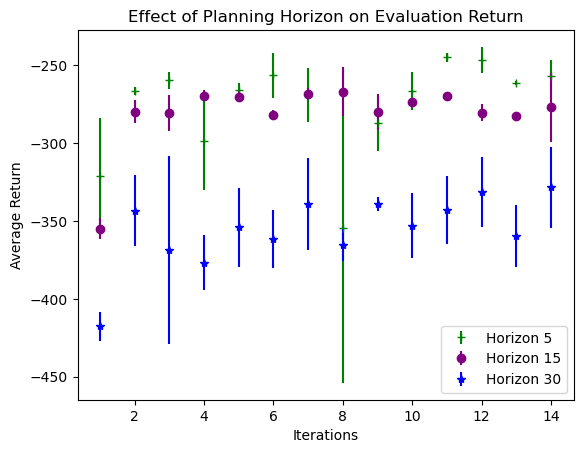

In [12]:
# efffect of planning horizon
log_file_h5 = "run_logs/q4/q4_reacher_horizon5/log_data.csv"
log_file_h15 = "run_logs/q4/q4_reacher_horizon15/log_data.csv"
log_file_h30 = "run_logs/q4/q4_reacher_horizon30/log_data.csv"

log_data_h5 = pd.read_csv(log_file_h5)
log_data_h15 = pd.read_csv(log_file_h15)
log_data_h30 = pd.read_csv(log_file_h30)

eval_y_h5 = log_data_h5['trainer/Eval_AverageReturn'][1:]
eval_std_h5 = log_data_h5['trainer/Eval_StdReturn'][1:]
train_y_h5 = log_data_h5['trainer/Train_AverageReturn'][1:]
train_std_h5 = log_data_h5['trainer/Train_StdReturn'][1:]

x_h5 = range(1, len(eval_y_h5) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration

fig, ax = plt.subplots()
ax.errorbar(x_h5, eval_y_h5, eval_std_h5, fmt='+', color='green', label='Horizon 5')

eval_y_h15 = log_data_h15['trainer/Eval_AverageReturn'][1:]
eval_std_h15 = log_data_h15['trainer/Eval_StdReturn'][1:]

x_h15 = range(1, len(eval_y_h15) + 1) # iteration number

ax.errorbar(x_h15, eval_y_h15, eval_std_h15, fmt='o', color='purple', label='Horizon 15')

eval_y_h30 = log_data_h30['trainer/Eval_AverageReturn'][1:]
eval_std_h30 = log_data_h30['trainer/Eval_StdReturn'][1:]

x_h30 = range(1, len(eval_y_h30) + 1) # iteration number

ax.errorbar(x_h30, eval_y_h30, eval_std_h30, fmt='*', color='blue', label='Horizon 30')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Effect of Planning Horizon on Evaluation Return')
plt.show()


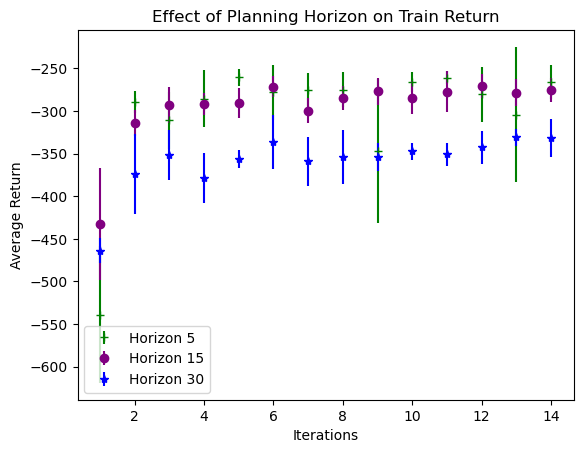

In [13]:
# efffect of planning horizon
log_file_h5 = "run_logs/q4/q4_reacher_horizon5/log_data.csv"
log_file_h15 = "run_logs/q4/q4_reacher_horizon15/log_data.csv"
log_file_h30 = "run_logs/q4/q4_reacher_horizon30/log_data.csv"

log_data_h5 = pd.read_csv(log_file_h5)
log_data_h15 = pd.read_csv(log_file_h15)
log_data_h30 = pd.read_csv(log_file_h30)

# eval_y_h5 = log_data_h5['trainer/Eval_AverageReturn'][1:]
# eval_std_h5 = log_data_h5['trainer/Eval_StdReturn'][1:]
train_y_h5 = log_data_h5['trainer/Train_AverageReturn'][1:]
train_std_h5 = log_data_h5['trainer/Train_StdReturn'][1:]

x_h5 = range(1, len(train_y_h5) + 1) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration

fig, ax = plt.subplots()
ax.errorbar(x_h5, train_y_h5, train_std_h5, fmt='+', color='green', label='Horizon 5')

train_y_h15 = log_data_h15['trainer/Train_AverageReturn'][1:]
train_std_h15 = log_data_h15['trainer/Train_StdReturn'][1:]

x_h15 = range(1, len(train_y_h15) + 1) # iteration number

ax.errorbar(x_h15, train_y_h15, train_std_h15, fmt='o', color='purple', label='Horizon 15')

train_y_h30 = log_data_h30['trainer/Train_AverageReturn'][1:]
train_std_h30 = log_data_h30['trainer/Train_StdReturn'][1:]

x_h30 = range(1, len(train_y_h30) + 1) # iteration number

ax.errorbar(x_h30, train_y_h30, train_std_h30, fmt='*', color='blue', label='Horizon 30')

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Effect of Planning Horizon on Train Return')
plt.show()


## Q5

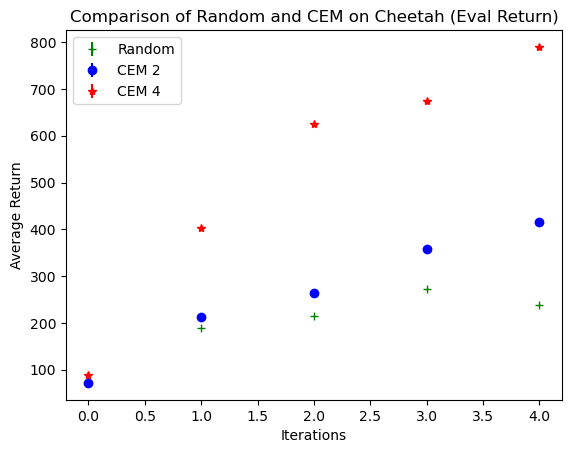

In [10]:
log_file_rand = "run_logs/q5/q5_cheetah_random/log_data.csv"
log_file_cem2 = "run_logs/q5/q5_cheetah_cem_2/log_data.csv"
log_file_cem4 = "run_logs/q5/q5_cheetah_cem_4/log_data.csv"

log_data_rand = pd.read_csv(log_file_rand)
log_data_cem2 = pd.read_csv(log_file_cem2)
log_data_cem4 = pd.read_csv(log_file_cem4)

eval_y_rand = log_data_rand['trainer/Eval_AverageReturn']
eval_std_rand = log_data_rand['trainer/Eval_StdReturn']
train_y_rand = log_data_rand['trainer/Train_AverageReturn']
train_std_rand = log_data_rand['trainer/Train_StdReturn']

x_rand = range(len(eval_y_rand)) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()

ax.errorbar(x_rand, eval_y_rand, eval_std_rand, fmt='+', color='green', label='Random')
# ax.errorbar(x_rand, train_y_rand, train_std_rand, fmt='+', color='green', label='Random')

# ================================================================
eval_y_cem2 = log_data_cem2['trainer/Eval_AverageReturn']
eval_std_cem2 = log_data_cem2['trainer/Eval_StdReturn']
train_y_cem2 = log_data_cem2['trainer/Train_AverageReturn']
train_std_cem2 = log_data_cem2['trainer/Train_StdReturn']

x_cem2 = range(len(eval_y_cem2)) # iteration number

# create a plot with Eval and Train returns for each iteration
ax.errorbar(x_cem2, eval_y_cem2, eval_std_cem2, fmt='o', color='blue', label='CEM 2')
# ax.errorbar(x_cem2, train_y_cem2, train_std_cem2, fmt='+', color='green', label='Random')



# ================================================================
eval_y_cem4 = log_data_cem4['trainer/Eval_AverageReturn']
eval_std_cem4 = log_data_cem4['trainer/Eval_StdReturn']
train_y_cem4 = log_data_cem4['trainer/Train_AverageReturn']
train_std_cem4 = log_data_cem4['trainer/Train_StdReturn']

x_cem4 = range(len(eval_y_cem4)) # iteration number

# create a plot with Eval and Train returns for each iteration
ax.errorbar(x_cem4, eval_y_cem4, eval_std_cem4, fmt='*', color='red', label='CEM 4')
# ax.errorbar(x_cem4, train_y_cem4, train_std_cem4, fmt='+', color='green', label='Random')


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Comparison of Random and CEM on Cheetah (Eval Return)')
plt.show()


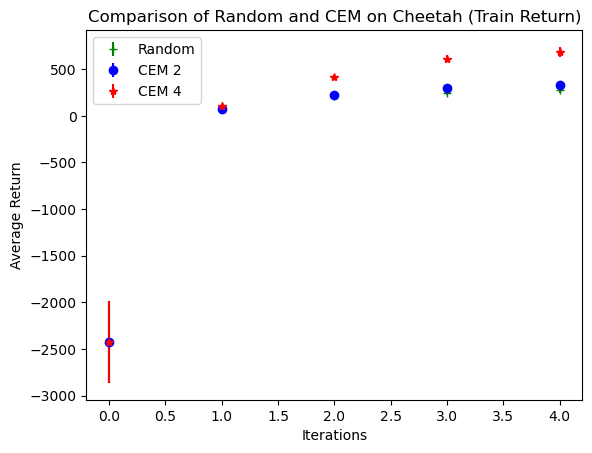

In [11]:
log_file_rand = "run_logs/q5/q5_cheetah_random/log_data.csv"
log_file_cem2 = "run_logs/q5/q5_cheetah_cem_2/log_data.csv"
log_file_cem4 = "run_logs/q5/q5_cheetah_cem_4/log_data.csv"

log_data_rand = pd.read_csv(log_file_rand)
log_data_cem2 = pd.read_csv(log_file_cem2)
log_data_cem4 = pd.read_csv(log_file_cem4)

# eval_y_rand = log_data_rand['trainer/Eval_AverageReturn']
# eval_std_rand = log_data_rand['trainer/Eval_StdReturn']
train_y_rand = log_data_rand['trainer/Train_AverageReturn']
train_std_rand = log_data_rand['trainer/Train_StdReturn']

x_rand = range(len(train_y_rand)) # iteration number

x_label = "Iterations"
y_label = "Average Return"

# create a plot with Eval and Train returns for each iteration
fig, ax = plt.subplots()

ax.errorbar(x_rand, train_y_rand, train_std_rand, fmt='+', color='green', label='Random')
# ax.errorbar(x_rand, train_y_rand, train_std_rand, fmt='+', color='green', label='Random')

# ================================================================
# eval_y_cem2 = log_data_cem2['trainer/Eval_AverageReturn']
# eval_std_cem2 = log_data_cem2['trainer/Eval_StdReturn']
train_y_cem2 = log_data_cem2['trainer/Train_AverageReturn']
train_std_cem2 = log_data_cem2['trainer/Train_StdReturn']

x_cem2 = range(len(train_y_cem2)) # iteration number

# create a plot with Eval and Train returns for each iteration
ax.errorbar(x_cem2, train_y_cem2, train_std_cem2, fmt='o', color='blue', label='CEM 2')
# ax.errorbar(x_cem2, train_y_cem2, train_std_cem2, fmt='+', color='green', label='Random')



# ================================================================
# eval_y_cem4 = log_data_cem4['trainer/Eval_AverageReturn']
# eval_std_cem4 = log_data_cem4['trainer/Eval_StdReturn']
train_y_cem4 = log_data_cem4['trainer/Train_AverageReturn']
train_std_cem4 = log_data_cem4['trainer/Train_StdReturn']

x_cem4 = range(len(train_y_cem4)) # iteration number

# create a plot with Eval and Train returns for each iteration
ax.errorbar(x_cem4, train_y_cem4, train_std_cem4, fmt='*', color='red', label='CEM 4')
# ax.errorbar(x_cem4, train_y_cem4, train_std_cem4, fmt='+', color='green', label='Random')


ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.legend()
ax.title.set_text('Comparison of Random and CEM on Cheetah (Train Return)')
plt.show()
